<a href="https://colab.research.google.com/github/sb3114/AI-Learning/blob/main/Mask%20detection%20model%20train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import packages
import tensorflow as tf
import keras
import zipfile
import cv2
from PIL import Image

ModuleNotFoundError: ignored

# Prepare Dataset

# First try

In [25]:
with zipfile.ZipFile('/content/observations-master.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

classes = ['with_mask', 'without_mask']

# Define data paths
base_dir = os.path.join('/content/observations-master/experiements', 'dest_folder')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

img_path = '/content/observations-master/experiements/dest_folder/test/with_mask/1-with-mask.jpg'
image = Image.open(img_path)
new_image = image.resize((224,224))
#need to save image first
new_name = 'resized_1-with-mask.jpg'
new_image.save('/content/observations-master/experiements/dest_folder/test/with_mask/resized_1-with-mask.jpg')

print(new_image.size)

(224, 224)


In [28]:
with zipfile.ZipFile('/content/observations-master.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

classes = ['with_mask', 'without_mask']

# Define data paths
base_dir = os.path.join('/content/observations-master/experiements', 'dest_folder')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

#Resize
classes = ['with_mask', 'without_mask']
data_type = ['train', 'val', 'test']
for data in data_type:
  data_path = os.path.join(base_dir, data)
  for cl in classes:
    cl_path = os.path.join(data_path, cl)
    for entry in os.listdir(cl_path):
      if os.path.isfile(os.path.join(cl_path, entry)):
        img_path = os.path.join(cl_path, entry)
        image = Image.open(img_path)
        new_image = image.resize((224,224))
        new_name = ('resized_' + entry)
        new_path = os.path.join(cl_path, new_name)
        #print(new_path)
        new_image.save(new_path)
        os.remove(img_path)

# fix issue

In [15]:
trash_path = '/content/observations-master'
try:
  shutil.rmtree(trash_path)
except OSError as e:
    print(f'Error: {trash_dir} : {e.strerror}')
  

# Data Augumentation


In [31]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


# Model param

In [34]:
BATCH_SIZE = 32
IMG_SHAPE  = 224 # Our training data consists of images with width of 150 pixels and height of 150 pixels

image_gen_train = ImageDataGenerator(
      rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


# Check aug

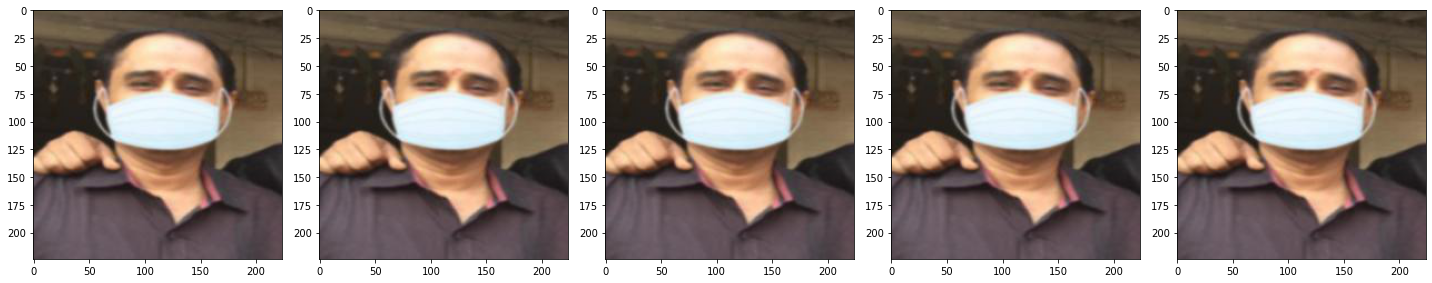

In [32]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)